# Loyalty Cards Analysis

# Config

In [241]:
import numpy as np
import pandas as pd
import os
from scipy import stats
import sys

sys.path.append('c:/Users/Jordi Cremades/Documents/Repos/central-node')

from utils import dataframe_visualizer ,query_engines

# Experiment parameters

- Test is in all devices, all countires all customers
- 50/50 Split
- Test begins on 2024-07-31
- MDE --> After 4 weeks of test, we can detect a rel. effect of 4% in LC order pen. With power 0.8 (20% chance of FN . \
With alpha 0.05 (5% chance of FP))

# Sanity check: Customer splitting

In [23]:
START_DATE = "'2024-07-01'"
END_DATE = "'2025-01-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'lc_analysis/customer_splitting.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='customer_splitting'
    ,load_from_output_file=None
    ,print_query=True
)

df.head()

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/c873d0395535a82eac262dcd2483269bd34dcc1d63c3d143a23ecfc44c998863


,date,variant,n_first_exposure_customers
0,2024-07-19,forced_assignment,15
1,2024-07-19,Control Group,1
2,2024-07-19,New loyalty program,1184
3,2024-07-20,New loyalty program,404
4,2024-07-20,forced_assignment,4


In [24]:
pivot_df = df.pivot(index='date', columns='variant', values='n_first_exposure_customers')
pivot_df.columns = ['n_first_exposure_customers_' + str(col) for col in pivot_df.columns]
pivot_df = pivot_df.reset_index()
pivot_df.head()

,date,n_first_exposure_customers_Control Group,n_first_exposure_customers_New loyalty program,n_first_exposure_customers_forced_assignment
0,2024-07-19,1.0,1184.0,15.0
1,2024-07-20,NaN,404.0,4.0
2,2024-07-21,NaN,284.0,4.0
3,2024-07-22,NaN,376.0,11.0
4,2024-07-23,1.0,1246.0,23.0


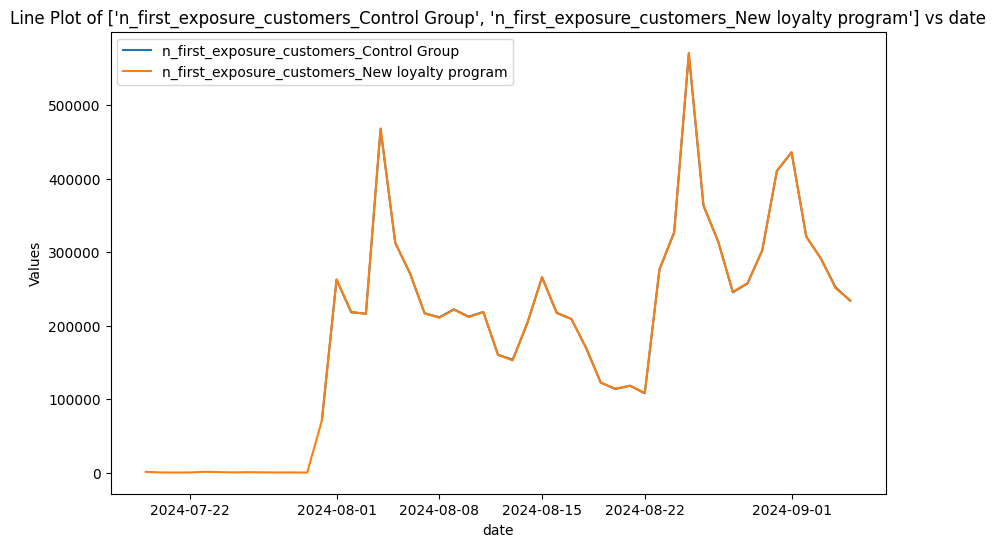

In [25]:
v = dataframe_visualizer.DataFrameVisualizer(pivot_df)

X_COLUMN = 'date'
Y_COLUMNS = ['n_first_exposure_customers_Control Group','n_first_exposure_customers_New loyalty program']
COLORS = ['blue', 'orange']

v.multiple_variable_lineplot(X_COLUMN, Y_COLUMNS, colors=COLORS)

Since the split is 50/50. This is the expected results. OK! We have the same name number of first exposures for the different versions of the experiment.

# Sanity check: Experiment versions

In [26]:
START_DATE = "'2024-07-01'"
END_DATE = "'2025-01-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'lc_analysis/lc_experiment_versions.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='lc_experiment_versions'
    ,load_from_output_file=None
    ,print_query=True
)

df.head()

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/a8c4ec04f0135a157a8313dc13b432356eccb11e5caffc196aa3d52c9f526519


,experiment_id,first_exposure_date
0,SONIC_LOYALTY_CARDS_NEW-11486-SONIC_LOYALTY_CA...,2024-07-31
1,SONIC_LOYALTY_CARDS_NEW-11379-SONIC_LOYALTY_CA...,2024-07-26
2,SONIC_LOYALTY_CARDS_NEW-11241-SONIC_LOYALTY_CA...,2024-07-23
3,SONIC_LOYALTY_CARDS_NEW-11241-SONIC_LOYALTY_CA...,2024-07-23
4,SONIC_LOYALTY_CARDS_NEW-11164-SONIC_LOYALTY_CA...,2024-07-19


OK! Consistent with the last version of the History we have in Admin.

# Loyalty Cards metrics

In [180]:
START_DATE = "'2024-07-31'"
END_DATE = "'2024-09-04'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'lc_analysis/lc_metrics.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='lc_metrics'
    ,load_from_output_file=None
    ,print_query=True
)

df.head()

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/c51567086e42f1770695993fac57e50bbe1a07cd6aab0f04ad5b1d005360bdbe


,p_creation_date,store_id,variant,sa_events_from_lcs,cvr_events_from_lcs,customers_lc_orders_from_lcs,orders_lc_orders_from_lcs,gmv_delivered_lc_orders_from_lcs,customers_all_orders_from_lcs,orders_all_orders_from_lcs,gmv_delivered_all_orders_from_lcs,customers_all_groceries,order_all_groceries,gmv_delivered_all_groceries
0,2024-08-27,727,Control Group,256,91,NaN,NaN,NaN,93.0,97.0,2446.540000,36401,40631,810191.169833
1,2024-08-26,59167,Control Group,37,6,NaN,NaN,NaN,6.0,6.0,131.810000,37315,41722,848027.185212
2,2024-09-01,48600,New loyalty program,9,5,2.0,2.0,61.400000,5.0,5.0,136.980000,39234,43760,813949.518638
3,2024-08-30,131873,New loyalty program,26,5,1.0,1.0,18.196738,5.0,5.0,141.558974,39545,44275,910270.858502
4,2024-08-09,37072,New loyalty program,43,19,1.0,1.0,19.250000,18.0,20.0,491.960000,34317,38105,781448.487578


In [184]:
df = df.fillna(0)
df

,p_creation_date,store_id,variant,sa_events_from_lcs,cvr_events_from_lcs,customers_lc_orders_from_lcs,orders_lc_orders_from_lcs,gmv_delivered_lc_orders_from_lcs,customers_all_orders_from_lcs,orders_all_orders_from_lcs,gmv_delivered_all_orders_from_lcs,customers_all_groceries,order_all_groceries,gmv_delivered_all_groceries
0,2024-08-27,727,Control Group,256,91,0.0,0.0,0.000000,93.0,97.0,2446.540000,36401,40631,810191.169833
1,2024-08-26,59167,Control Group,37,6,0.0,0.0,0.000000,6.0,6.0,131.810000,37315,41722,848027.185212
2,2024-09-01,48600,New loyalty program,9,5,2.0,2.0,61.400000,5.0,5.0,136.980000,39234,43760,813949.518638
3,2024-08-30,131873,New loyalty program,26,5,1.0,1.0,18.196738,5.0,5.0,141.558974,39545,44275,910270.858502
4,2024-08-09,37072,New loyalty program,43,19,1.0,1.0,19.250000,18.0,20.0,491.960000,34317,38105,781448.487578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31799,2024-08-08,394823,New loyalty program,8,1,1.0,1.0,12.582855,3.0,3.0,32.966662,32799,36421,724216.986215
31800,2024-08-06,207816,New loyalty program,71,14,2.0,2.0,49.650000,15.0,16.0,332.420000,31992,35606,711137.534518
31801,2024-08-25,43369,Control Group,78,21,2.0,2.0,49.190000,23.0,23.0,414.000000,36063,39961,731010.335359
31802,2024-09-02,101426,Control Group,39,9,0.0,0.0,0.000000,9.0,9.0,155.651344,39984,45238,930068.167327


In [234]:
df_grouped = df.groupby(['p_creation_date','variant']).sum().reset_index()
df_grouped.drop('store_id',axis=1, inplace=True)

control = df_grouped[df_grouped['variant'] == 'Control Group']
variant = df_grouped[df_grouped['variant'] == 'New loyalty program']

control['cvr'] = control['cvr_events_from_lcs']/control['sa_events_from_lcs']
variant['cvr'] = variant['cvr_events_from_lcs']/variant['sa_events_from_lcs']

control['aov_lc_orders_from_lcs'] = control['gmv_delivered_lc_orders_from_lcs']/control['orders_lc_orders_from_lcs']
variant['aov_lc_orders_from_lcs'] = variant['gmv_delivered_lc_orders_from_lcs']/variant['orders_lc_orders_from_lcs']

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_9676\2278181197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['cvr'] = control['cvr_events_from_lcs']/control['sa_events_from_lcs']
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_9676\2278181197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant['cvr'] = variant['cvr_events_from_lcs']/variant['sa_events_from_lcs']
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_9676\2278181197.py:10: SettingWithCopyWarning: 
A value is tr

The dataset is now prepared

# Control and Variant datasets

In [235]:
control.head()

,p_creation_date,variant,sa_events_from_lcs,cvr_events_from_lcs,customers_lc_orders_from_lcs,orders_lc_orders_from_lcs,gmv_delivered_lc_orders_from_lcs,customers_all_orders_from_lcs,orders_all_orders_from_lcs,gmv_delivered_all_orders_from_lcs,customers_all_groceries,order_all_groceries,gmv_delivered_all_groceries,cvr,aov_lc_orders_from_lcs
0,2024-07-31,Control Group,2162,603,74.0,75.0,1907.259902,715.0,745.0,18124.035637,1141536,1219680,2.383318e+07,0.278908,25.430132
2,2024-08-01,Control Group,9463,3080,374.0,383.0,11001.906807,3716.0,3885.0,101717.937659,7375249,8196809,1.711428e+08,0.325478,28.725605
4,2024-08-02,Control Group,9447,3048,301.0,315.0,8687.080216,3388.0,3547.0,90515.177098,6835866,7618134,1.554736e+08,0.322642,27.578032
6,2024-08-03,Control Group,10640,3607,353.0,370.0,10687.626299,3954.0,4163.0,110076.343138,7593521,8460387,1.779474e+08,0.339004,28.885476
8,2024-08-04,Control Group,16159,4674,484.0,502.0,14238.662283,5511.0,5744.0,139382.714423,12841686,14235078,2.629573e+08,0.289251,28.363869


In [236]:
variant.head()

,p_creation_date,variant,sa_events_from_lcs,cvr_events_from_lcs,customers_lc_orders_from_lcs,orders_lc_orders_from_lcs,gmv_delivered_lc_orders_from_lcs,customers_all_orders_from_lcs,orders_all_orders_from_lcs,gmv_delivered_all_orders_from_lcs,customers_all_groceries,order_all_groceries,gmv_delivered_all_groceries,cvr,aov_lc_orders_from_lcs
1,2024-07-31,New loyalty program,2134,565,109.0,112.0,3021.671098,702.0,731.0,18553.713529,1118481,1208445,2.365588e+07,0.264761,26.979206
3,2024-08-01,New loyalty program,9704,3165,674.0,689.0,19967.273742,3824.0,3996.0,103268.724985,7533600,8350470,1.731153e+08,0.326154,28.980078
5,2024-08-02,New loyalty program,9814,3083,599.0,624.0,17458.574386,3436.0,3610.0,93254.143219,6903714,7684256,1.548992e+08,0.314143,27.978485
7,2024-08-03,New loyalty program,10453,3478,685.0,702.0,20235.542015,3863.0,4025.0,104398.881772,7727471,8575251,1.763491e+08,0.332727,28.825558
9,2024-08-04,New loyalty program,16345,4675,959.0,983.0,25750.935868,5501.0,5764.0,139170.204494,12884084,14278936,2.620012e+08,0.286020,26.196273


# Prepare t-test function

In [260]:
def perform_t_test(merged_df, column_name):
    merged_df = merged_df.dropna()
    
    # Extract control and variant columns
    control_values = merged_df[f'{column_name}_Control']
    variant_values = merged_df[f'{column_name}_Variant']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(control_values, variant_values)
    
    # Print the t-statistic and p-value
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    # Check significance at alpha level of 0.05
    alpha = 0.05
    if p_value < alpha:
        print("The result is statistically significant.")
    else:
        print("The result is not statistically significant.")
    
    # Calculate total accumulated difference between control and variant
    accumulated_diff = (merged_df[f'{column_name}_Control'] - merged_df[f'{column_name}_Variant']).sum()
    
    # Print total accumulated difference
    print(f"Total Accumulated Difference: {accumulated_diff}")
    # Calculate and print z-score if necessary (based on the t-statistic)
    z_score = t_stat / np.sqrt(1/len(control_values) + 1/len(variant_values))
    print(f"Z-score: {z_score}")

# Metrics: CVR

We now aggregate data at a date and variant level for some sanity checks with plots

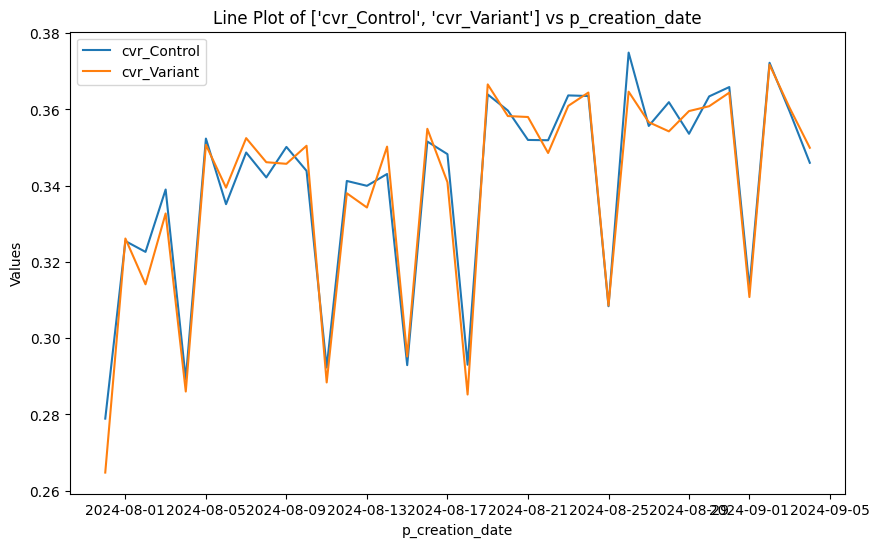

In [248]:
COLUMN_NAME = 'cvr'

merged = pd.merge(
    control[['p_creation_date',COLUMN_NAME]]
    ,variant[['p_creation_date',COLUMN_NAME]]
    ,on='p_creation_date',suffixes=('_Control','_Variant'))

v = dataframe_visualizer.DataFrameVisualizer(merged)
y1 = COLUMN_NAME+'_Control'
y2 = COLUMN_NAME+'_Variant'

X_COLUMN = 'p_creation_date'
Y_COLUMNS = [y1,y2]
COLORS = ['blue', 'orange']

v.multiple_variable_lineplot(X_COLUMN, Y_COLUMNS, colors=COLORS)

In [249]:
perform_t_test(merged,COLUMN_NAME)

T-statistic: 0.19958361991308549
P-value: 0.8423848799913393
The result is not statistically significant.
Total Accumulated Difference: 0.04493115977445716
Z-score: 0.8467615863258072


# Metric: Orders with Loyalty Cards from stores with Loyalty Cards

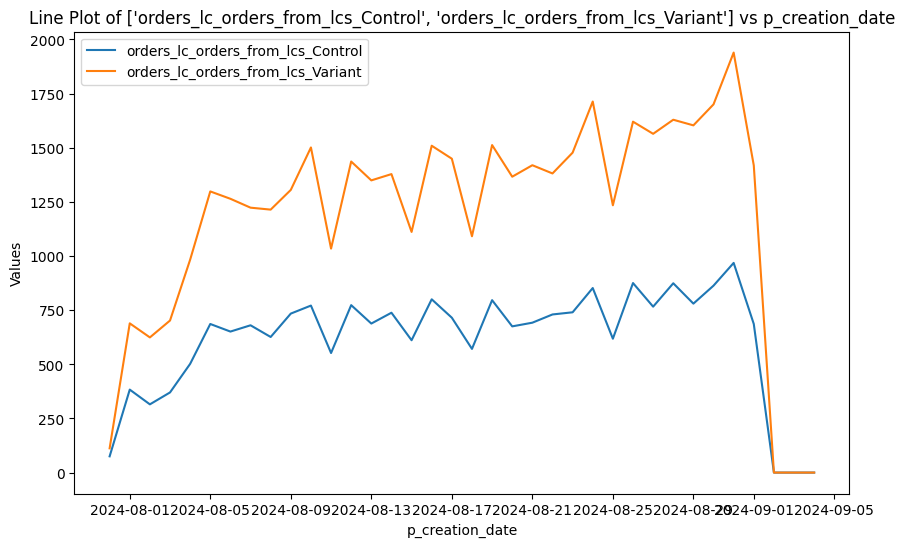

In [250]:
COLUMN_NAME = 'orders_lc_orders_from_lcs'

merged = pd.merge(
    control[['p_creation_date',COLUMN_NAME]]
    ,variant[['p_creation_date',COLUMN_NAME]]
    ,on='p_creation_date',suffixes=('_Control','_Variant'))

v = dataframe_visualizer.DataFrameVisualizer(merged)
y1 = COLUMN_NAME+'_Control'
y2 = COLUMN_NAME+'_Variant'

X_COLUMN = 'p_creation_date'
Y_COLUMNS = [y1,y2]
COLORS = ['blue', 'orange']

v.multiple_variable_lineplot(X_COLUMN, Y_COLUMNS, colors=COLORS)

In [251]:
perform_t_test(merged,COLUMN_NAME)

T-statistic: -6.108366609737316
P-value: 5.0382927983788854e-08
The result is statistically significant.
Total Accumulated Difference: -20691.0
Z-score: -25.915604710312426


# Metric: Orders (with and without) Loyalty Cards from stores with Loyalty Cards

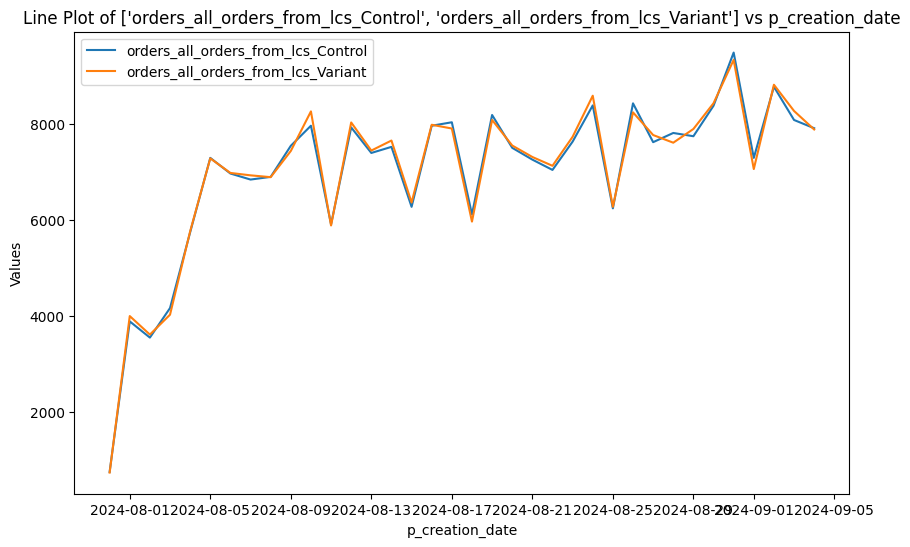

In [252]:
COLUMN_NAME = 'orders_all_orders_from_lcs'

merged = pd.merge(
    control[['p_creation_date',COLUMN_NAME]]
    ,variant[['p_creation_date',COLUMN_NAME]]
    ,on='p_creation_date',suffixes=('_Control','_Variant'))

v = dataframe_visualizer.DataFrameVisualizer(merged)
y1 = COLUMN_NAME+'_Control'
y2 = COLUMN_NAME+'_Variant'

X_COLUMN = 'p_creation_date'
Y_COLUMNS = [y1,y2]
COLORS = ['blue', 'orange']

v.multiple_variable_lineplot(X_COLUMN, Y_COLUMNS, colors=COLORS)

In [253]:
perform_t_test(merged,COLUMN_NAME)

T-statistic: -0.04259803584894151
P-value: 0.9661432369845397
The result is not statistically significant.
Total Accumulated Difference: -610.0
Z-score: -0.18072816008408513


# Metric: GMV delivered (with and without) Loyalty Cards from stores with Loyalty Cards

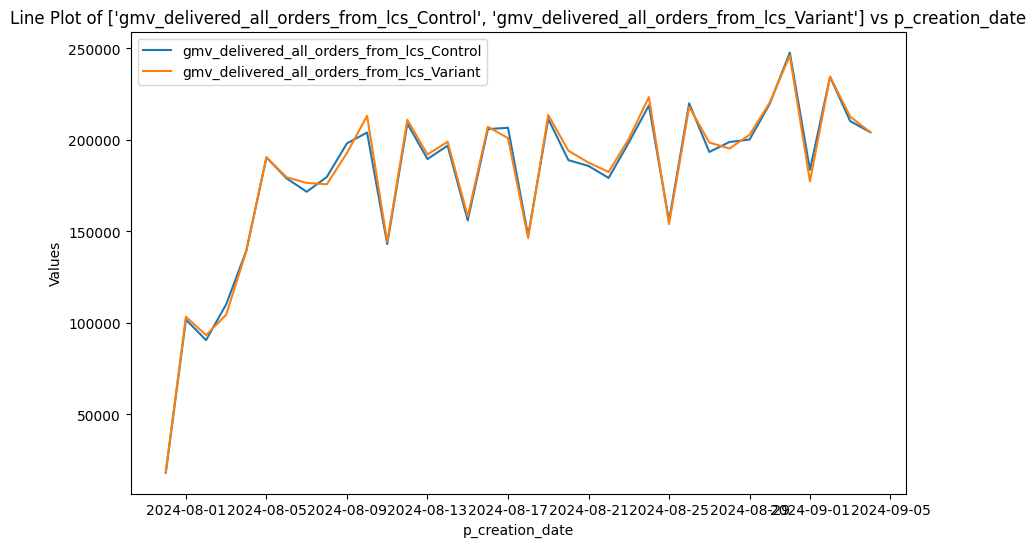

In [254]:
COLUMN_NAME = 'gmv_delivered_all_orders_from_lcs'

merged = pd.merge(
    control[['p_creation_date',COLUMN_NAME]]
    ,variant[['p_creation_date',COLUMN_NAME]]
    ,on='p_creation_date',suffixes=('_Control','_Variant'))

v = dataframe_visualizer.DataFrameVisualizer(merged)
y1 = COLUMN_NAME+'_Control'
y2 = COLUMN_NAME+'_Variant'

X_COLUMN = 'p_creation_date'
Y_COLUMNS = [y1,y2]
COLORS = ['blue', 'orange']

v.multiple_variable_lineplot(X_COLUMN, Y_COLUMNS, colors=COLORS)

In [255]:
perform_t_test(merged,COLUMN_NAME)

T-statistic: -0.06217997200546531
P-value: 0.9505967170115794
The result is not statistically significant.
Total Accumulated Difference: -23723.556819180107
Z-score: -0.2638072791543253


# Metric: AOV orders with Loyalty Cards from stores with Loyalty Cards

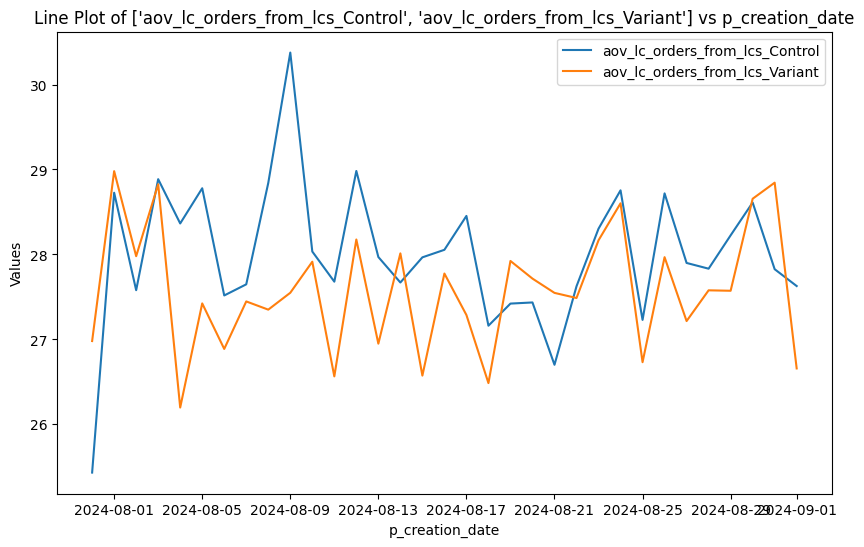

In [261]:
COLUMN_NAME = 'aov_lc_orders_from_lcs'

merged = pd.merge(
    control[['p_creation_date',COLUMN_NAME]]
    ,variant[['p_creation_date',COLUMN_NAME]]
    ,on='p_creation_date',suffixes=('_Control','_Variant'))

v = dataframe_visualizer.DataFrameVisualizer(merged)
y1 = COLUMN_NAME+'_Control'
y2 = COLUMN_NAME+'_Variant'

X_COLUMN = 'p_creation_date'
Y_COLUMNS = [y1,y2]
COLORS = ['blue', 'orange']

v.multiple_variable_lineplot(X_COLUMN, Y_COLUMNS, colors=COLORS)

In [262]:
perform_t_test(merged,COLUMN_NAME)

T-statistic: 2.238987515833418
P-value: 0.028640468912837558
The result is statistically significant.
Total Accumulated Difference: 14.312039549493491
Z-score: 9.094810283065577


In [271]:
merged['diff'] = merged['aov_lc_orders_from_lcs_Variant'] - merged['aov_lc_orders_from_lcs_Control']
merged

,p_creation_date,aov_lc_orders_from_lcs_Control,aov_lc_orders_from_lcs_Variant,diff
0,2024-07-31,25.430132,26.979206,1.549074
1,2024-08-01,28.725605,28.980078,0.254473
2,2024-08-02,27.578032,27.978485,0.400452
3,2024-08-03,28.885476,28.825558,-0.059918
4,2024-08-04,28.363869,26.196273,-2.167597
5,2024-08-05,28.778439,27.422403,-1.356036
6,2024-08-06,27.515869,26.886163,-0.629706
7,2024-08-07,27.647035,27.445721,-0.201315
8,2024-08-08,28.840818,27.348936,-1.491881
9,2024-08-09,30.376233,27.547598,-2.828635
